In [1]:
import FomFunc
import fompy.materials
import fompy.models
import fompy.units
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Si = fompy.materials.Si
Eg = fompy.units.to_unit(Si.Eg, 'eV')
me = fompy.units.to_unit(Si.me, 'kg')
mh = fompy.units.to_unit(Si.mh, 'kg')
T = 200
Eg = 1.12
print(fompy.units.to_unit(Si.me, 'kg'))
print(0.36*FomFunc.Constants.m0)
print(fompy.units.to_unit(Si.mh, 'kg'))
print(0.81*FomFunc.Constants.m0)
# массы сходятся

3.27924e-31
3.276e-31
7.3782900000000005e-31
7.371000000000001e-31


In [3]:
print(fompy.units.to_unit(Si.Nc(T), '1/m^3'))
Nc = FomFunc.get_N(me, T)
print(Nc)

print(fompy.units.to_unit(Si.Nv(T), '1/m^3'))
Nv = FomFunc.get_N(mh, T)
print(Nv)

eps = Si.eps
print(eps)

2.9478007828414685e+24
2.9832621560191864e+24
9.948827642089958e+24
1.0068509776564757e+25
11.7


In [4]:
Jd = FomFunc.get_E_connective(me, eps)
print(Jd)

0.03580131636936371


In [5]:
Ea = FomFunc.get_E_connective(mh, eps)
print(Ea)

0.08055296183106835


In [6]:
Ed = Eg - Jd
print(Ed)

1.0841986836306363


In [21]:
_Ed = fompy.units.from_unit(Ed, 'eV')
_Ea = fompy.units.from_unit(Ea, 'eV')
print(_Ea, _Ed)
Na = 2*1e16 # см-3
Nd = 1e17 # см-3
Si_n = fompy.models.DopedSemiconductor(Si, 0, 0, Nd, _Ed)
Si_p = fompy.models.DopedSemiconductor(Si, Na,_Ea, 0, 0) 

1.2904584485337148e-13 1.7368862911762794e-12


In [8]:
Ef_n = fompy.units.to_unit(Si_n.fermi_level(T), 'eV')
Ef_p = fompy.units.to_unit(Si_p.fermi_level(T), 'eV')
print(Ef_n)
print(Ef_p)

1.060120658874512
0.10813518524169922


In [9]:
delta = Ef_n - Ef_p
# delta_Ef = convert_eV_to_Joule(delta)
print(delta)
# print(delta_Ef) 

0.9519854736328128


In [10]:
_Na = Na*1e6 # в  СИ
_Nd = Nd*1e6 # в СИ
W = FomFunc.get_W(_Na, _Nd, eps, delta) # delta в eV??
print(W)

1.9247996694604967e-07


In [11]:
Wp = FomFunc.get_Wp(_Na, _Nd, eps, delta)
Wn = FomFunc.get_Wn(_Na, _Nd, eps, delta)
print(Wp, Wn, Wn + Wp)

2.2683981645019042e-07 4.536796329003809e-08 2.722077797402285e-07


In [12]:
#_Eg = convert_eV_to_Joule(Eg)
ni = FomFunc.get_ni(Nc, Nv, Eg, T)
print(f'{ni:e}')

np0 = FomFunc.get_np0(_Na, ni)
print(np0)

pn0 = FomFunc.get_pn0(_Nd, ni)
print(pn0)

3.359639e+10
0.056435885030358526
0.011287177006071706


In [13]:
alpha_p = 1e-2# 3e-3 # см
alpha_n = 4*1e-2# 3e-2 # см

_alpha_p = alpha_p*1e-2
_alpha_n = alpha_n*1e-2

tau_n = 5*1e-5# 1e-4    
tau_p = 1e-5 # 1e-5

In [19]:
Dn = 36*1e-4 # FomFunc.get_D(_alpha_n, tau_n)
Dp = 12*1e-4 # FomFunc.get_D(_alpha_p, tau_p)

print(Dn, Dp)
print(FomFunc.get_D(_alpha_n, tau_n), FomFunc.get_D(_alpha_p, tau_p))

0.0036000000000000003 0.0012000000000000001
0.0031999999999999997 0.001


In [15]:
S = 1*1e-6 # м**2
J0 = FomFunc.get_J0(Dp, pn0, _alpha_p, Dn, np0, _alpha_n, S)
print(J0)

9.029741604857364e-26


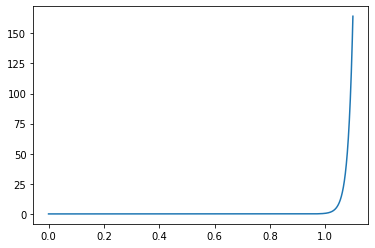

In [16]:
U = np.linspace(0, 1.1, 100000)
J = [J0*(np.exp(FomFunc.Constants.e*u/(FomFunc.Constants.k*T) - 1)) for u in U]
plt.plot(U, J)

In [17]:
max_Power = 50
for i in range(len(J)):
    if J[i]*U[i] >= max_Power:
        print(J[i])
        break

46.381139093531715
